In [1]:
import yaml
import json
import sys
import os
import itertools
import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import cmocean
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

%matplotlib inline

/Users/lee.8024/.pyenv/versions/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
HFB_OBJECTS = ['FractCoord', 'UnitCell',
               'HoppingDiagonal', 'HoppingOffdiagonal',
               'InteractionDiagonal', 'InteractionOffdiagonal',
               'FullHamiltonian', 'HFBSolver', 'HFBComputer']

def jsonconv(obj):
    if isinstance(obj, int):
        return obj
    elif isinstance(obj, float):
        return obj
    elif isinstance(obj, str):
        return obj
    elif isinstance(obj, list):
        return [jsonconv(o) for o in obj]
    elif isinstance(obj, tuple):
        return tuple(jsonconv(o) for o in obj)
    elif isinstance(obj, dict):
        if 'type' in obj:
            if obj['type'] == 'Symbol':
                return obj['value']
            elif obj['type'] == 'Tuple':
                return tuple(jsonconv(obj['value']))
            elif obj['type'] in HFB_OBJECTS:
                return {k: jsonconv(v) for k,v in obj.items()}
            else:
                print(obj['type'])
                print(obj.keys())
                raise TypeError("HA")
        elif 'real' in obj and 'imag' in obj:
            return complex(obj['real'], obj['imag'])
        elif 're' in obj and 'im' in obj:
            return complex(obj['re'], obj['im'])
        else:
            return {k: jsonconv(v) for k,v in obj.items()}
    else:
        return obj

In [7]:
dirname='Results/os_zigzag/out_w=24_n1=24_mAB=0.050_U=-1.000_V=0.000'

In [8]:
with open(os.path.join(dirname,'hamiltonian.json'), 'r') as f:
    hamiltonian = json.load(f)
    hamiltonian = jsonconv(hamiltonian)
with open(os.path.join(dirname,'hfbcomputer.json'), 'r') as f:
    hfbcomputer = json.load(f)
    hfbcomputer = jsonconv(hfbcomputer)


In [9]:
with open(os.path.join(dirname,'result_concise.yaml'), 'r') as f:
    for result in yaml.load_all(f):
        pass

In [10]:
import json

In [11]:
with open(os.path.join(dirname,'eigenvalues.json'), 'r') as f:
    eigen = json.load(f)

In [12]:
Deltas = jsonconv(result['Delta'])
maxDelta = np.max(np.abs(Deltas))


In [13]:
unitcell = hamiltonian['unitcell']
hoppings = hamiltonian['hoppings']

In [14]:
latticevectors = np.array(unitcell['latticevectors'])
orbitals = unitcell['orbitals']

In [15]:
print(latticevectors)
def oc(idx):
    fc = orbitals[idx-1][1]
    fc = np.array(fc['whole']) + np.array(fc['fraction'])
    return np.dot(fc, latticevectors)


[[ 3.46410162  0.        ]
 [-0.8660254   1.5       ]]


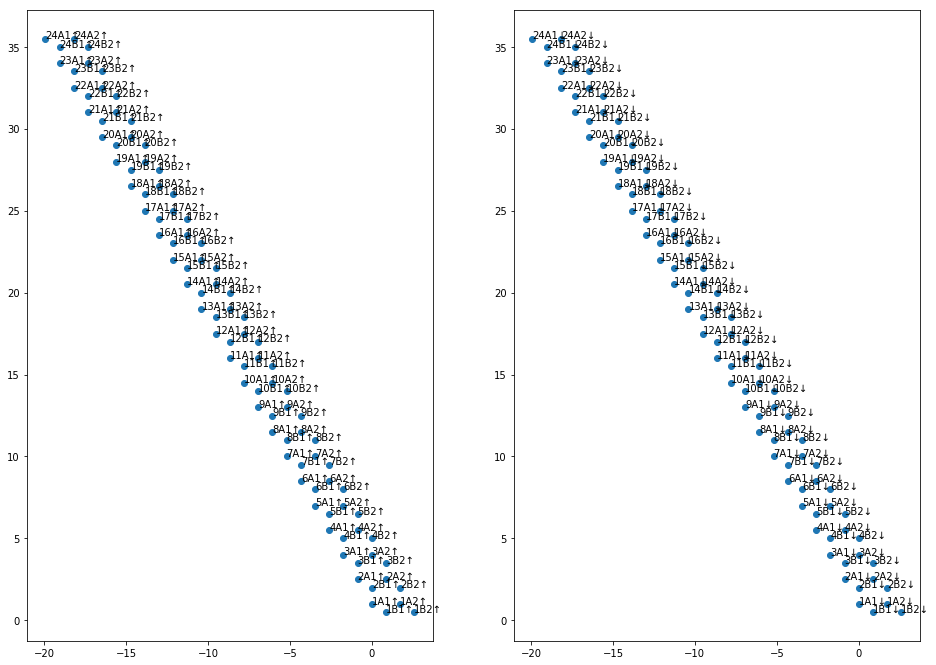

In [16]:

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

upcoords = []
dncoords = []

def signature(orbname):
    ret = []
    for o in orbname:
        if o == 'UP':
            ret.append(r'↑')
        elif o == 'DN':
            ret.append(r'↓')
        else:
            ret.append(str(o))
    return '{}'.format(''.join(ret))

for (orbname, fc) in orbitals:
    r = np.dot( np.array(fc['fraction']) + np.array(fc['whole']), latticevectors)
    if orbname[-1] == 'UP':
        upcoords.append(r)
        ax1.annotate(signature(orbname), xy=r, fontsize=10)
    else:
        dncoords.append(r)
        ax2.annotate(signature(orbname), xy=r, fontsize=10)
        
upcoords = np.array(upcoords)
dncoords = np.array(dncoords)

ax1.plot(upcoords[:,0], upcoords[:,1], 'o')
ax1.set_aspect(1.0)

ax2.plot(dncoords[:,0], dncoords[:,1], 'o')
ax2.set_aspect(1.0)


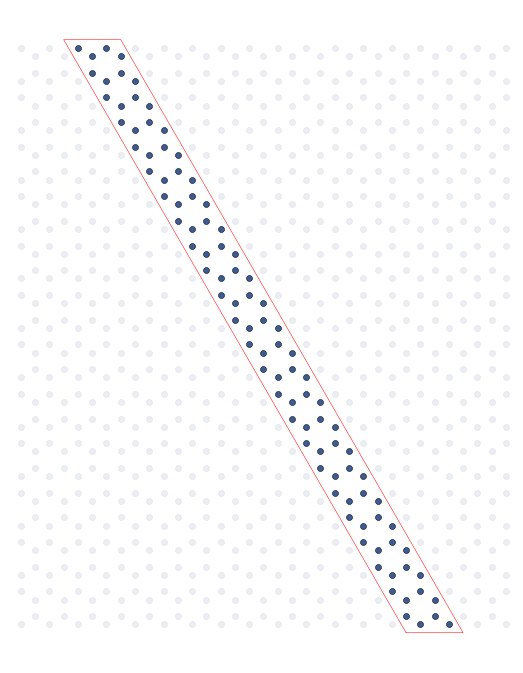

In [17]:


upcoords = []
dncoords = []

def signature(orbname):
    ret = []
    for o in orbname:
        if o == 'UP':
            ret.append(r'↑')
        elif o == 'DN':
            ret.append(r'↓')
        else:
            ret.append(str(o))
    return '{}'.format(''.join(ret))

for (orbname, fc) in orbitals:
    r = np.dot( np.array(fc['fraction']) + np.array(fc['whole']), latticevectors)
    if orbname[-1] == 'UP':
        upcoords.append(r)
        #ax1.annotate(signature(orbname), xy=r, fontsize=10)
    else:
        dncoords.append(r)
        #ax2.annotate(signature(orbname), xy=r, fontsize=10)
        
upcoords = np.array(upcoords)
dncoords = np.array(dncoords)



fig = plt.figure(figsize=(12,12))
ax = fig.gca()
for i1 in range(-12,11):
    alpha = 1.0 if i1 == 0 else 0.1
    ax.plot(upcoords[:,0] + latticevectors[0,0] * i1, upcoords[:,1] + latticevectors[0,1] * i1, 'o',
           markeredgecolor='k',
           markerfacecolor=sns.xkcd_rgb['denim blue'], markeredgewidth=0.5, alpha=alpha)

corners = np.array([[0, 0], 
                    24*latticevectors[1,:], 
                    24*latticevectors[1,:] + latticevectors[0,:],
                    latticevectors[0,:] + np.array([0,0]),
                    [0,0]])

ax.plot(corners[:,0], corners[:,1], linewidth=0.5, color='r')
ax.set_aspect(1.0)
#ax.set_ylim(-7.5,13.5)
ax.set_xlim(-24, 6.5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
fig.savefig('geometry_zigzagstrip.png', dpi=300, bbox_inches='tight')

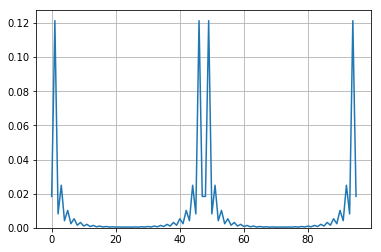

In [18]:
plt.plot( np.abs(Deltas) )
plt.ylim(0, None)
plt.grid()

# On-site Plots

In [19]:
refDelta = 0.5 # Reference Delta
markerSizeRatio = 15

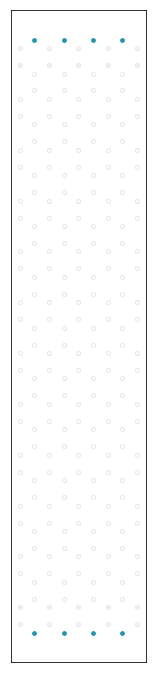

In [20]:
TOLERANCE = 1E-6

fig = plt.figure(figsize=(16,12))
#axs = [fig.add_subplot(1,4,i) for i in [1,2,3,4]]
ax = fig.gca()

ax.set_aspect(1.0)
for i1, i2 in itertools.product(range(-6,7),[0]):
    r0 = np.dot([i1,i2], latticevectors)
    ax.plot(r0[0] + upcoords[:,0],
            r0[1] + upcoords[:,1],
            'o',
            zorder=0,
            color='k',
            alpha=0.1,
            markerfacecolor='w', 
            markeredgecolor='k',
           markersize=4)

for ((isdiag, rowindex, colindex, vec, srcs), Delta) in zip(hfbcomputer['Delta_registry'], Deltas):
    row_orbname, row_fc = orbitals[rowindex-1]
    col_orbname, col_fc = orbitals[colindex-1]
    assert(row_orbname[1] == col_orbname[1])
    if row_orbname[3] == 'UP':
        vec = np.array(vec)
    elif row_orbname[3] == 'DN':
        (rowindex, colindex) = (colindex, rowindex)
        (row_orbname, col_orbname) = (col_orbname, row_orbname)
        (row_fc, col_fc) = (col_fc, row_fc)
        vec = -np.array(vec)
        Delta = -Delta
    
    if np.abs(Delta) < TOLERANCE:
        continue
        
    c = cmocean.cm.phase((np.angle(Delta) / (2*np.pi)) % 1.0)
    alpha = np.abs(Delta) / maxDelta
    for i1, i2 in itertools.product(range(-6,7), [0]):
        r0 = np.dot([i1,i2], latticevectors)
        ri = oc(rowindex) + r0
        assert(np.all(np.isclose(vec, 0)))
        ax.plot([ri[0]], [ri[1]],
                'o',
                markersize=np.abs(Delta)/refDelta*markerSizeRatio,
                color=c,
                alpha=alpha)
        #axs[panelindex].plot([ri[0], rj[0]], [ri[1], rj[1]], '-', linewidth=np.abs(Delta)*4, color=c)

ax.set_xlim(-4,4)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('edgemode.pdf', dpi=300, bbox_inches='tight')
plt.savefig('edgemode.png', dpi=300, bbox_inches='tight')


## Solution

In [21]:
eigenvalues = np.array(eigen['eigenvalues'])
momentums =  np.array(eigen["momentums"])
print(momentums.shape)

(1, 120, 2)


In [34]:
#ks = np.sqrt( np.sum(np.abs(momentums)**2, axis=(1,2)) )
ks = momentums[0,:,0]

(-2, 2)

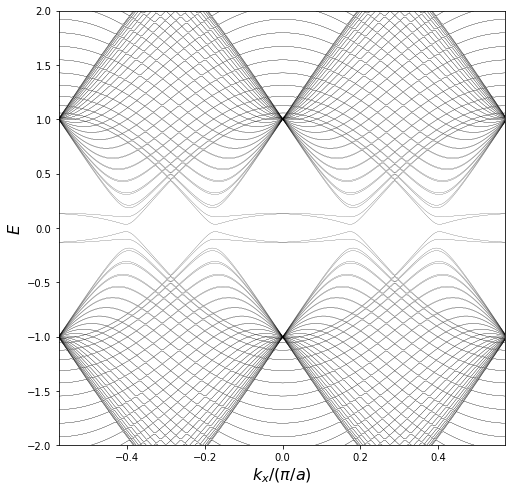

In [43]:
plt.figure(figsize=(8, 8))
#xs = np.hstack([ks - np.pi / (np.sqrt(3)), ks])
xs = np.hstack([ks/np.pi - 1/(np.sqrt(3)), ks/np.pi])
for i in range(eigenvalues.shape[1]):
    ys = np.hstack([eigenvalues[:,i], eigenvalues[:,i]])
    plt.plot(xs, ys, 'k-', linewidth=0.1)
#plt.ylim(-1.5, 1.5)
plt.xlabel('$k_x/(\pi/a)$', fontsize=16)
plt.ylabel('$E$', fontsize=16)
#plt.xlim(np.min(ks), np.max(ks) + 2*np.pi/6.0)
plt.xlim(np.min(xs), np.max(xs))
#plt.xlim(-np.pi/6, np.pi/6)
plt.ylim(-2, 2)

In [47]:
dirname = 'Results/os_zigzag/out_w=24_n1=24_mAB=0.050_U=0.000_V=0.000'

In [49]:
with open(os.path.join(dirname,'eigenvalues.json'), 'r') as f:
    bare_eigen = json.load(f)

In [50]:
eigenvalues = np.array(bare_eigen['eigenvalues'])
momentums =  np.array(bare_eigen["momentums"])
print(momentums.shape)

(1, 120, 2)


In [51]:
#ks = np.sqrt( np.sum(np.abs(momentums)**2, axis=(1,2)) )
ks = np.copy(momentums[0,:,1])
ks *= 6
ks /= np.pi

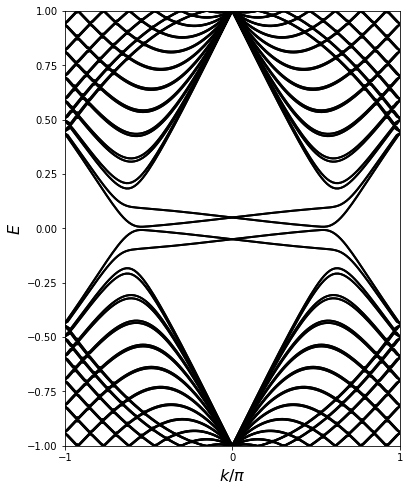

In [52]:
plt.figure(figsize=(6,8))
#xs = np.hstack([ks, ks + 2*np.pi / 6.0])
xs = np.hstack([ks - 2, ks])
for i in range(eigenvalues.shape[1]):
    ys = np.hstack([eigenvalues[:,i],eigenvalues[:,i]])
    plt.plot(xs, ys, 'k-', linewidth=2)
#plt.ylim(-1.5, 1.5)
plt.xlabel('$k$', fontsize=16)
plt.ylabel('$E$', fontsize=16)
#plt.xlim(np.min(ks), np.max(ks) + 2*np.pi/6.0)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xticks([-1,0,1])

plt.xlabel('$k/\pi$', fontsize=16)
plt.ylabel('$E$', fontsize=16)
plt.savefig('baredispersion_zigzag.png', dpi=300, bbox_inches='tight')

In [129]:
coords = []
for orbital in data['UnitCell']['Orbitals']:
    fractcoord = orbital['Coord']
    coord = np.array(fractcoord['fraction']) + np.array(fractcoord['whole'])
    coord = a1 * coord[0] + a2 * coord[1]
    orbital['Index']
    orbital['Name']
    coords.append(coord)
coords = np.array(coords)

fig = plt.figure()
ax = fig.gca()
ax.plot(coords[:,0], coords[:,1], 'o')
ax.set_aspect(1.0)
ax.arrow(0,0, a1[0], a1[1], length_includes_head=True)
ax.arrow(0,0, a2[0], a2[1], length_includes_head=True)
ax.set_xlim(-0.5, a1[0] + a2[0] + 0.5)
ax.set_ylim(-0.5, a1[1] + a2[1] + 0.5)


NameError: name 'data' is not defined